In [35]:
import numpy as np
import pandas as pd
import os
from scipy.io import loadmat
import scipy.io as sio
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [28]:
X  = np.load("E:/STUDY/Publications/Thesis/Brain Emotion Detection/Dataset/Practice with datasets/Seed/de_LDS_Extracted/X and Y/X.npy")
y  = np.load("E:/STUDY/Publications/Thesis/Brain Emotion Detection/Dataset/Practice with datasets/Seed/de_LDS_Extracted/X and Y/y.npy")

In [29]:
X, y = shuffle(X, y, random_state=1)

# Train Test Split

In [45]:
# Flatten the X array so it can be used in k-NN
X_flatten = X.reshape(X.shape[0], -1)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flatten, y, test_size=0.2, random_state=42)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(540, 82150)
(135, 82150)
(540,)
(135,)


# Choosing K Value

Best k value: 17


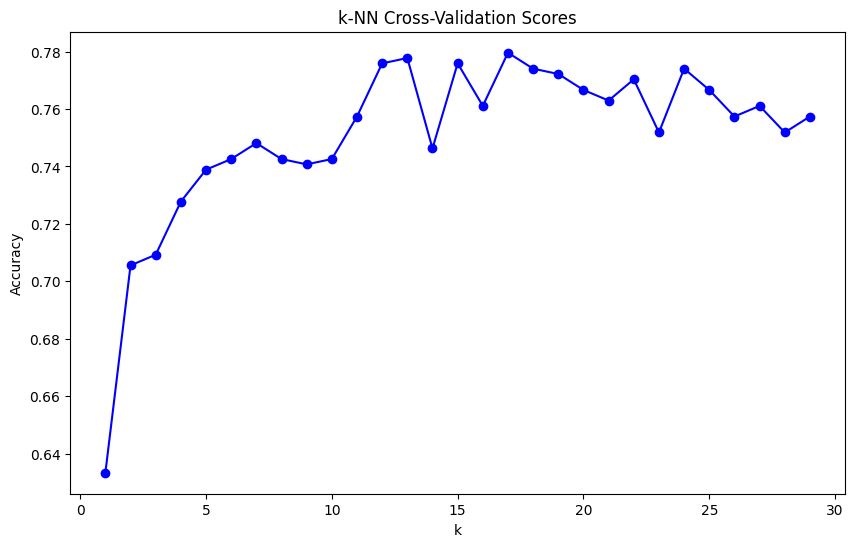

In [47]:
# Define a range of k values to try
k_values = list(range(1, 30))

# Dictionary to store cross-validation scores for each k
cv_scores = {}

# Perform k-fold cross-validation for each k on the training set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores[k] = np.mean(scores)

# Find the k with the highest cross-validation score
best_k = max(cv_scores, key=cv_scores.get)

print(f"Best k value: {best_k}")

# Plotting the cross-validation scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(list(cv_scores.keys()), list(cv_scores.values()), marker='o', linestyle='-', color='b')
plt.title('k-NN Cross-Validation Scores')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()



# KNN

Classification Report on Test Set:
              precision    recall  f1-score   support

        -1.0       0.80      0.67      0.73        48
         0.0       0.88      0.86      0.87        44
         1.0       0.71      0.86      0.78        43

    accuracy                           0.79       135
   macro avg       0.80      0.80      0.79       135
weighted avg       0.80      0.79      0.79       135



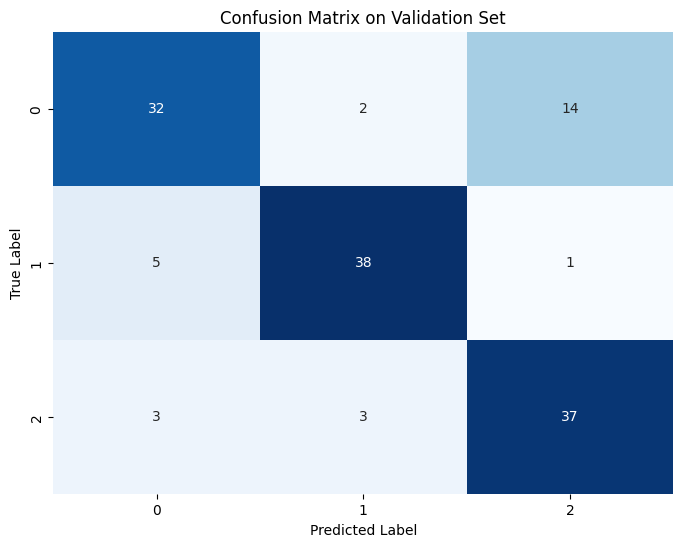

Accuracy on Validation Set: 79.25925925925927%


In [50]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
y_pred = final_knn.predict(X_test)

print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix on Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracy on the Validation Set
accuracy_val = final_knn.score(X_test, y_test)
print(f"Accuracy on Validation Set: {accuracy_val*100}%")